In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0)

from sklearn import linear_model
from sklearn.cross_validation import train_test_split


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

housing.csv



***READ THE INPUT DATASET FILE***

In [2]:
data=pd.read_csv("../input/housing.csv")
df=data.drop(['ocean_proximity'],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


**HANDLE THE MISSING VALUES(NaN,Null,-)**

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [4]:
df1=df.dropna(axis=0)
df1.head()
df1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

*DATA VISUALISATION*

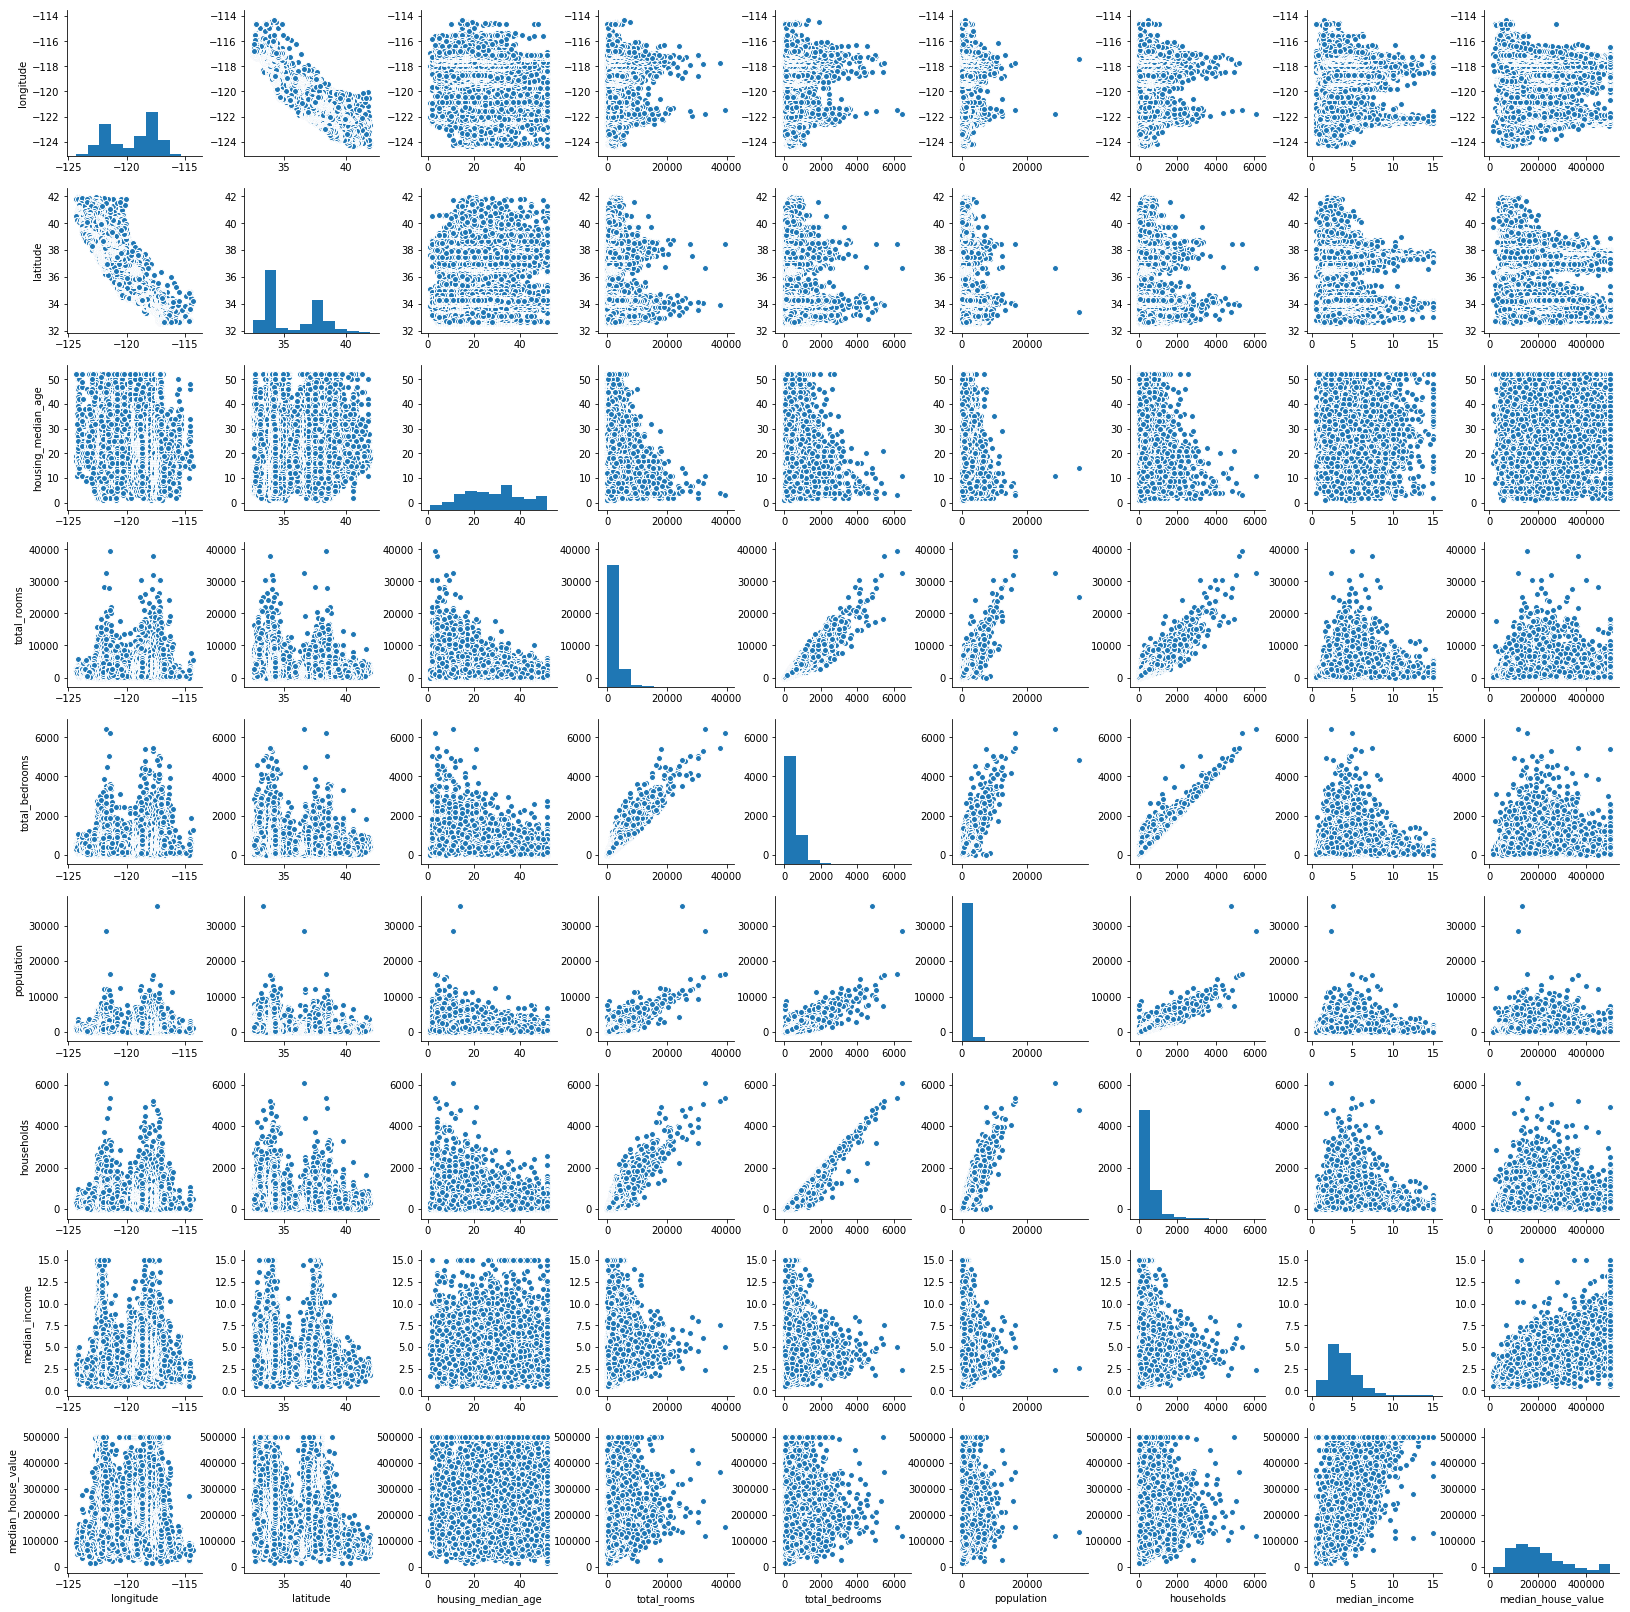

In [5]:
sb.pairplot(df1)

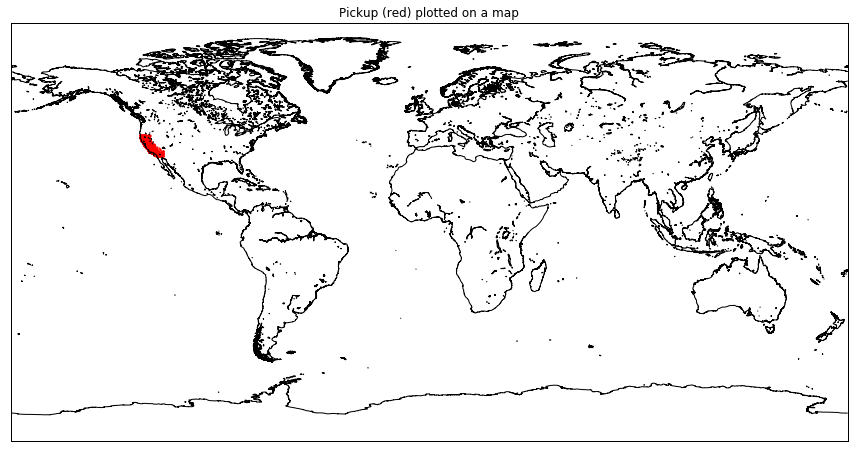

In [39]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

map = Basemap(llcrnrlon=-119.417931,llcrnrlat=36.778259, resolution = 'i')

map.drawmapboundary(fill_color='white')
map.drawcoastlines()

lons = [0] #needed to interpret the latitude and longitude by basemap plot
lats = [0]

x, y = map(lons, lats)

map.scatter(df1['longitude'], df1['latitude'], s=1, color='red')

plt.title('Pickup (red) plotted on a map')
plt.show()


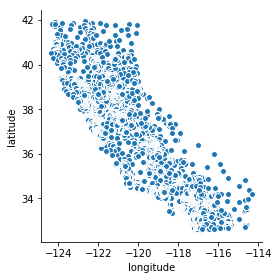

In [14]:
sb.pairplot(df1, palette='husl', y_vars='latitude', x_vars='longitude', kind='scatter',size=4.0)


In [8]:
avg_income=sum(df1['median_income'])/len(df1['median_income'])

In [9]:
avg_income

3.8711616013312273

**Data Splitting Into X and Y**

In [21]:
X=df1.iloc[:, :-1].values
Y=df1.iloc[:, 8].values


In [24]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

**MODELS**

In [27]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
pred=Lr.predict(X_test)

In [ ]:
Lr.score(X_test,Y_test)

In [31]:
print('Predicted Value :',pred[0])
print('Actual Value :',Y_test[0])

Predicted Value : 306053.975706
Actual Value : 275200.0


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
Ld=LogisticRegression()
Ld.fit(X_train,Y_train)

In [ ]:
y_pred=ld.predict(X_test)

In [ ]:
Ld.score(X_test,Y_test)

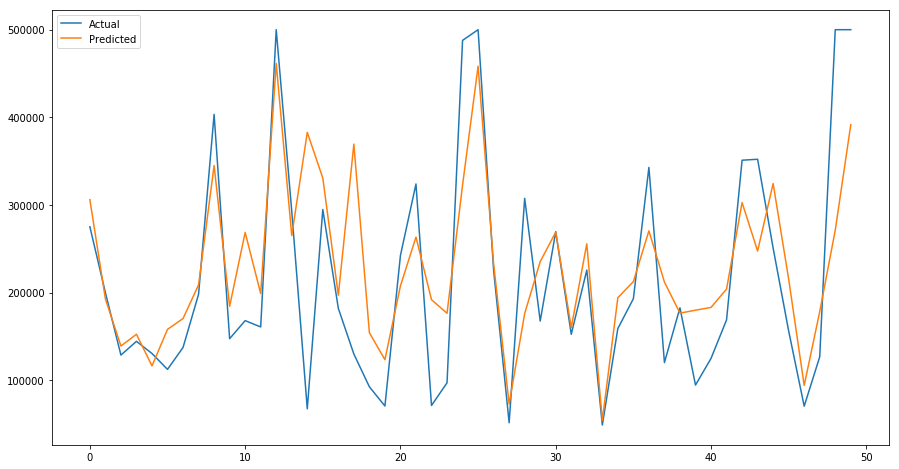

In [34]:
res = pd.DataFrame({'Predicted':pred,'Actual':Y_test})
res = res.reset_index()
res = res.drop(['index'],axis=1)
plt.plot(res[:50])
plt.legend(['Actual','Predicted'])

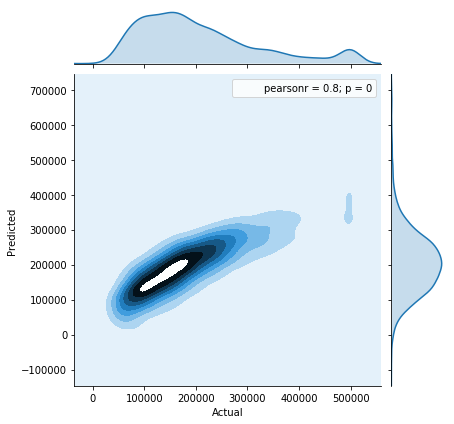

In [36]:
sb.jointplot(x='Actual',y='Predicted',data=res,kind='kde')

**NOW FOR SUBMISSION CSV**

In [38]:
res.to_csv("Submission.csv",index=False)
